In [27]:
from ultralytics import YOLO
import gradio as gr
from google.colab import files
import matplotlib.pyplot as plt
import cv2

In [28]:
model=YOLO('yolo11n.pt')

In [29]:
uploaded=files.upload()

Saving objects.jpeg to objects (1).jpeg


In [30]:
img_path=list(uploaded.keys())[0]

In [31]:
img=cv2.imread(img_path)

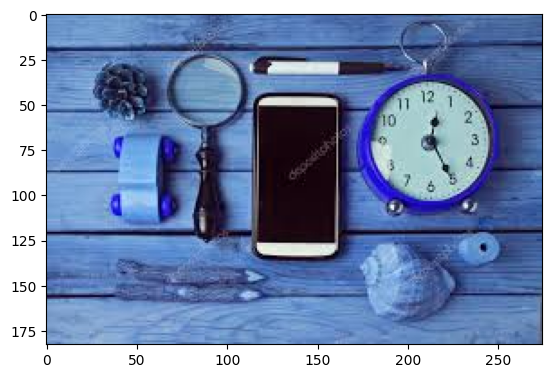

In [32]:
plt.imshow(img)

In [33]:
results=model(img_path)


image 1/1 /content/objects (1).jpeg: 448x640 1 cell phone, 1 clock, 254.0ms
Speed: 7.8ms preprocess, 254.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


In [35]:
boxes=results[0].plot()

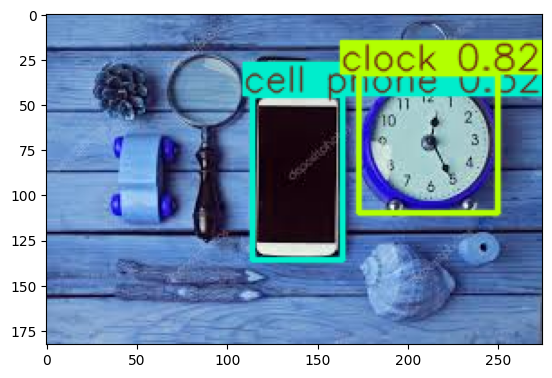

In [36]:
plt.imshow(boxes)

In [37]:
def detect_objects(image):
    # Perform inference on the input image
    results = model(image)

    # Display the image with bounding boxes and confidence scores
    # First, extract the image with bounding boxes
    image_with_boxes = results[0].plot()

    return image_with_boxes ## this image (objects detected image) is shown as output

# Create a Gradio interface
iface = gr.Interface(
    fn=detect_objects,    # this function is called when the image is uploaded
    inputs=gr.Image(),         # Input is an image
    outputs=gr.Image(),       # Output is the image with bounding boxes
    live=True                          # Set live to True for instant feedback
)

# Launch the Gradio app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a39bbe008878c13512.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
